# Tarea 2 

Ciencia de redes

> Thamara Lopez y Fabián Ortega



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import collections
import networkx as nx
from community import community_louvain


%matplotlib inline

In [3]:
import csv
authors_graph = nx.Graph()

with open('data/CA-GrQc.txt', 'r') as f:
    reader = csv.reader(f, delimiter='\t')
    for row in reader:
        authors_graph.add_edge(row[0], row[1])

## Ejercicio 1

Cree una lista de tuplas (nodo, grado de nodo) y busque el nodo con el grado máximo.  
grado de nodo = número de vecinos

In [4]:
# Busqueda del nodo con grado máximo
print(f"El nodo con el grado máximo es: {max(nx.degree_centrality(authors_graph), key=nx.degree_centrality(authors_graph).get)}" )

El nodo con el grado máximo es: 21012


In [5]:
# Creamos lista de tuplas con nodo y grado de nodo
lista = [(k, v) for k, v in nx.degree_centrality(authors_graph).items()]

def Sort_Tuple(tup): 
     '''Función para ordenar listas de tuplas'''
     tup.sort(key = lambda x: x[1], reverse=True) 
     return tup 

Sort_Tuple(lista)[0:5] # Muestro los 5 nodos con mayor grado de nodo

[('21012', 0.015455065827132226),
 ('21281', 0.01507345926349933),
 ('22691', 0.014691852699866437),
 ('12365', 0.014691852699866437),
 ('6610', 0.012974623163518412)]

## Ejercicio 2

Trace un histograma de centralidad de grado de author_graph.

Sugerencia: `plt.hist(list_of_values)` trazará un histograma

(count vs grado)

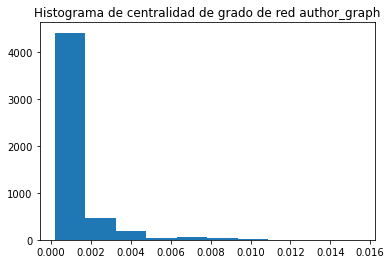

In [6]:
centralidad = nx.degree_centrality(authors_graph)
plt.hist(centralidad.values())
plt.title('Histograma de centralidad de grado de red author_graph')
plt.show()

### Ejercicio 3

Encuentre el "número" del autor '22504' del grafo `author_graph`, si no hay conexión entre los nodos, asignele el número '-1'.
También trace un histograma del "número" autor '22504'.

Encuentre la longitud de ruta más corta promedio en el primer componente, es decir, `graphs[0]`

SUGERENCIA: `nx.shortest_path_length`

**Lo hicimos en clase**

In [30]:
# Guardamos subgrafos en una lista
graphs = [authors_graph.subgraph(c).copy() for c in sorted(nx.connected_components(authors_graph), key=len, reverse=True)]

d = {}
for node in authors_graph.nodes():#para cada nodo
    try:
        #calcula la longitud del camino mas corto entre node y `22504`
        d[node] = nx.shortest_path_length(graphs[0], '22504', node) #21012;22504
    except:
        #si arroja error (no hay camino) asinga un -1.
        #d[node] = -1 duda. d
        next

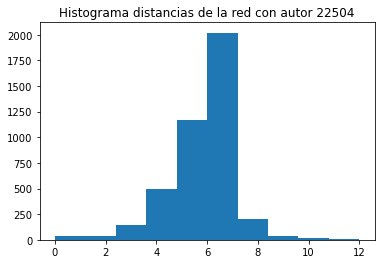

In [33]:
plt.hist(list(d.values()))
plt.title('Histograma distancias de la red con autor 22504')
plt.show()

In [36]:
print(f"La longitud de ruta más corta promedio en el primer componente es de {np.mean(list(d.values()))} enlaces")

La longitud de ruta más corta promedio en el primer componente es de 5.61014911014911 enlaces


### Ejercicio 4

Cree una nueva medida de centralidad, `weighted_degree(Graph, weight)` que toma Graph y el atributo de peso y devuelve un diccionario de grados ponderados. El grado ponderado se calcula sumando el peso de todos los enlaces de un nodo. Luego, encuentre los cinco personajes más importantes de acuerdo con esta medida.

In [38]:
book1 = pd.read_csv('data/asoiaf-book1-edges.csv')
book2 = pd.read_csv('data/asoiaf-book2-edges.csv')
book3 = pd.read_csv('data/asoiaf-book3-edges.csv')
book4 = pd.read_csv('data/asoiaf-book4-edges.csv')
book5 = pd.read_csv('data/asoiaf-book5-edges.csv')

G_book1 = nx.Graph()
G_book2 = nx.Graph()
G_book3 = nx.Graph()
G_book4 = nx.Graph()
G_book5 = nx.Graph()

for row in book1.iterrows(): #Itera las filas de DataFrame como pares (index, series).
    G_book1.add_edge(row[1]['Source'], row[1]['Target'],weight=row[1]['weight'], book=row[1]['book'])
for row in book2.iterrows():
    G_book2.add_edge(row[1]['Source'], row[1]['Target'], weight=row[1]['weight'], book=row[1]['book'])
for row in book3.iterrows():
    G_book3.add_edge(row[1]['Source'], row[1]['Target'], weight=row[1]['weight'], book=row[1]['book'])
for row in book4.iterrows():
    G_book4.add_edge(row[1]['Source'], row[1]['Target'], weight=row[1]['weight'], book=row[1]['book'])
for row in book5.iterrows():
    G_book5.add_edge(row[1]['Source'], row[1]['Target'], weight=row[1]['weight'], book=row[1]['book'])
    
books = [G_book1, G_book2, G_book3, G_book4, G_book5]

In [175]:
def weighted_degree(Graph, weight): 
    '''Función que calcula degree_centrality ponderado por pesos'''
    N = len(Graph.nodes()) 
    degrees = Graph.degree() #dict de grados
    pesos = sum(j for i, j in list(Graph.degree(weight='weight')))# dict de pesos
    
    weighted_d = {}
    for node in Graph.degree():
        weighted_d[node[0]] = dict(G_book1.degree())[node[0]]*(Graph.degree(weight='weight')[node[0]]/pesos)/(N-1)
    
    return weighted_d
    

In [176]:
weighted_degree(G_book1, 'weight')

{'Addam-Marbrand': 6.56897865519869e-06,
 'Jaime-Lannister': 0.0025505884345102025,
 'Tywin-Lannister': 0.001453204055833399,
 'Aegon-I-Targaryen': 6.56897865519869e-06,
 'Daenerys-Targaryen': 0.0033950671349618562,
 'Eddard-Stark': 0.030926751508675434,
 'Aemon-Targaryen-(Maester-Aemon)': 0.0001890406079662734,
 'Alliser-Thorne': 0.00029195460689771956,
 'Bowen-Marsh': 5.109205620710092e-05,
 'Chett': 2.0801765741462517e-05,
 'Clydas': 1.824716293110747e-06,
 'Jeor-Mormont': 0.0008587114875379177,
 'Jon-Snow': 0.01058627404611131,
 'Samwell-Tarly': 0.0006481392273129374,
 'Aerys-II-Targaryen': 8.101740341411718e-05,
 'Brandon-Stark': 8.977604162104876e-05,
 'Gerold-Hightower': 3.10201769828827e-05,
 'Jon-Arryn': 0.0009251311606071487,
 'Robert-Baratheon': 0.01717058031817213,
 'Aggo': 7.882774386238427e-05,
 'Drogo': 0.0017750840099381349,
 'Jhogo': 9.415536072451454e-05,
 'Jorah-Mormont': 0.0007306164037615431,
 'Quaro': 3.831904215532569e-05,
 'Rakharo': 4.3793191034657933e-05,
 'Al

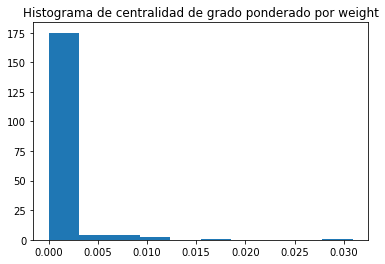

In [178]:
plt.hist(list(weighted_degree(G_book1, 'weight').values()))
plt.title('Histograma de centralidad de grado ponderado por weight')
plt.show()

In [179]:
sorted(weighted_degree(G_book1, 'weight').items(), key=lambda x:x[1], reverse=True)[0:10]

[('Eddard-Stark', 0.030926751508675434),
 ('Robert-Baratheon', 0.01717058031817213),
 ('Tyrion-Lannister', 0.010911803432802267),
 ('Jon-Snow', 0.01058627404611131),
 ('Catelyn-Stark', 0.008160131262791262),
 ('Sansa-Stark', 0.0069612926582175005),
 ('Robb-Stark', 0.006590875250716019),
 ('Bran-Stark', 0.006201115850507564),
 ('Cersei-Lannister', 0.004642078249673741),
 ('Joffrey-Baratheon', 0.0046201816541564114)]

### Ejercicio 5 (resuelto)

Trace la evolución de la centralidad de grado ponderado de los personajes antes mencionados sobre los 5 libros y repita el mismo ejercicio para la centralidad de intermediación.

<AxesSubplot:>

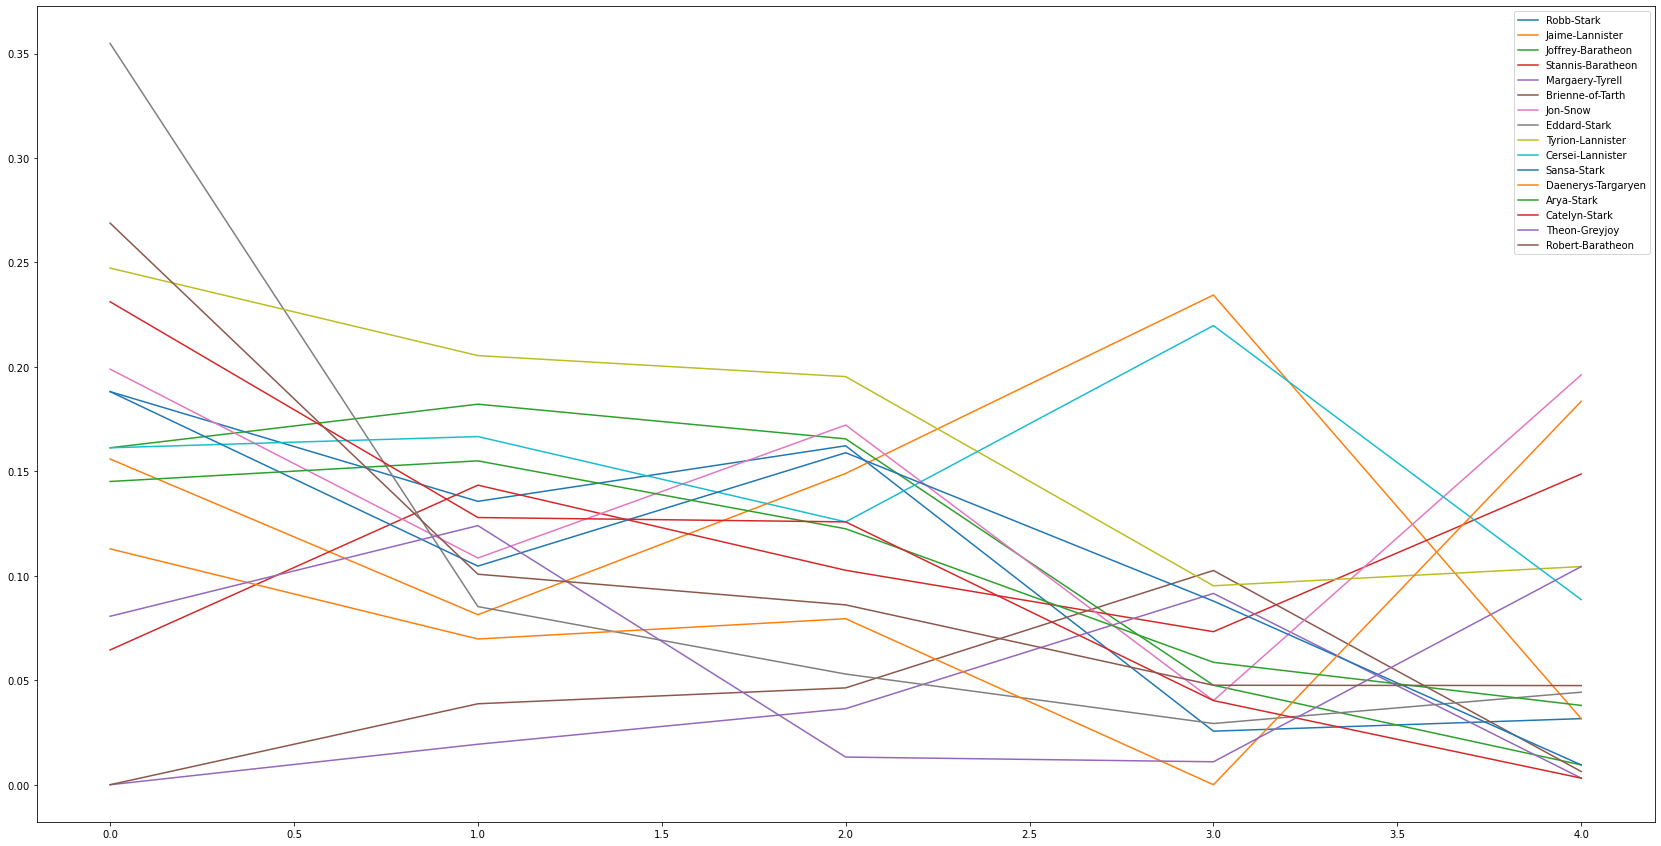

In [180]:
evol = [nx.degree_centrality(book) for book in books]#para cada red calcula el grado de nodo
evol_df = pd.DataFrame.from_records(evol).fillna(0)#Crea un objeto DataFrame a partir de un ndarray estructurado, una secuencia de tuplas o diccionarios, o un DataFrame.
set_of_char = set()
for i in range(5):
    set_of_char |= set(list(evol_df.T[i].sort_values(ascending=False)[0:5].index))# `|=` hace una unión de conjuntos
#     print(set_of_char)
set_of_char
evol_df[list(set_of_char)].plot(figsize=(29,15))

<AxesSubplot:>

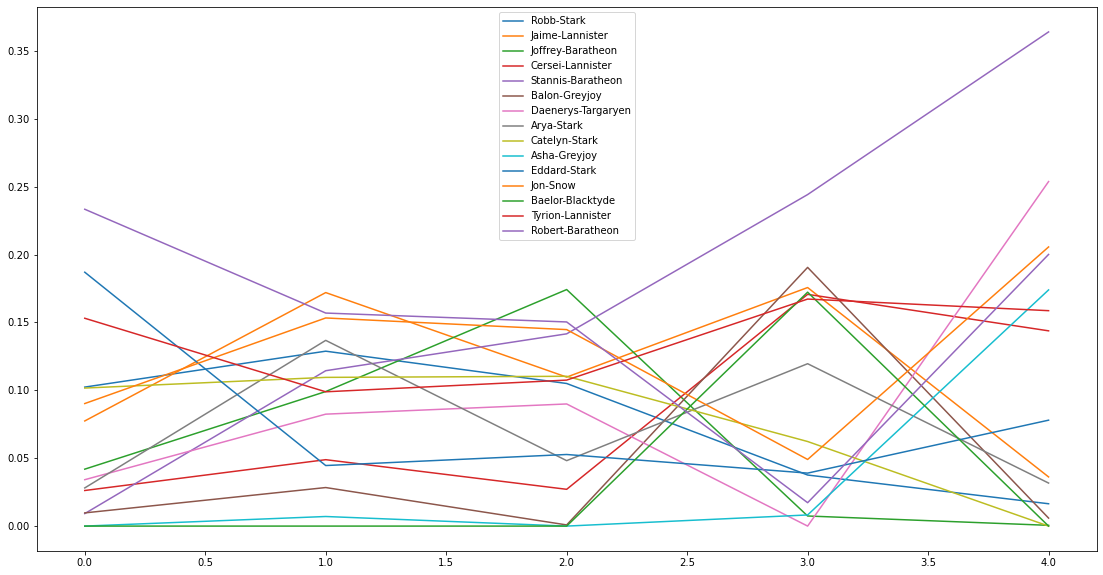

In [181]:
evol = [nx.betweenness_centrality(graph, weight='weight') for graph in [G_book1, G_book2, G_book3, G_book4, G_book5]]
evol_df = pd.DataFrame.from_records(evol).fillna(0)



set_of_char = set()
for i in range(5):
    set_of_char |= set(list(evol_df.T[i].sort_values(ascending=False)[0:5].index))


evol_df[list(set_of_char)].plot(figsize=(19,10))

### Ejercicio 6

Encuentre el nodo más importante en las particiones según su centralidad de grado (esta es la normalizada).

In [193]:
# partition = community.best_partition(G_book1)
partition =community_louvain.best_partition(G_book1)
d = {}
for character, par in partition.items():
    if par in d:
        d[par].append(character)
    else:
        d[par] = [character]


In [200]:
nx.betweenness_centrality(nx.subgraph(G_book1, d[0]), normalized=True)

{'Edmure-Tully': 0.09060540651659987,
 'Jyck': 0.0,
 'Colemon': 0.0,
 'Tytos-Blackwood': 0.0425531914893617,
 'Lyn-Corbray': 0.0,
 'Morrec': 0.0,
 'Walder-Frey': 0.0014646931853222326,
 'Brynden-Tully': 0.037526981190255944,
 'Stevron-Frey': 0.0,
 'Mychel-Redfort': 0.0,
 'Leo-Lefford': 0.0,
 'Donnel-Waynwood': 0.0,
 'Tyrion-Lannister': 0.4919518963922294,
 'Gunthor-son-of-Gurn': 0.0,
 'Shagga': 0.08649398704902868,
 'Vardis-Egen': 0.01580326857847672,
 'Wendel-Manderly': 0.0,
 'Hoster-Tully': 0.0,
 'Willis-Wode': 0.005072463768115943,
 'Catelyn-Stark': 0.4608541473943879,
 'Marillion': 0.0,
 'Clement-Piper': 0.0,
 'Bronn': 0.0507554733271662,
 'Eon-Hunter': 0.0,
 'Lysa-Arryn': 0.07299311337239181,
 'Mya-Stone': 0.0,
 'Robert-Arryn': 0.0,
 'Tywin-Lannister': 0.031426662555247196,
 'Jaime-Lannister': 0.08783019837598931,
 'Timett': 0.0,
 'Dolf': 0.0,
 'Masha-Heddle': 0.0,
 'Chiggen': 0.0,
 'Moreo-Tumitis': 0.0,
 'Addam-Marbrand': 0.0,
 'Karyl-Vance': 0.0425531914893617,
 'Conn': 0.042553

In [205]:
n1 = max(nx.betweenness_centrality(nx.subgraph(G_book1, d[0]), normalized=True), key=nx.betweenness_centrality(nx.subgraph(G_book1, d[0]), normalized=True).get)
value1 = nx.betweenness_centrality(nx.subgraph(G_book1, d[0]), normalized=True)[n1]
print(f"el nodo más importante del libro 1 es {n1}, que tiene una centralidad de intermediación de {value1}")

el nodo más importante del libro 1 es Tyrion-Lannister, que tiene una centralidad de intermediación de 0.4919518963922294
